In [139]:
import pandas as pd
import glob
import os
import datetime
import matplotlib.pyplot as plt

## Merging 12 months of sales Data into a single file

In [41]:
joined_list = glob.glob("C:/Users/alexc/OneDrive/Documents/AnalysisProject/Sales_Data/Sales_*.csv")
print(joined_list)

['C:/Users/alexc/OneDrive/Documents/AnalysisProject/Sales_Data\\Sales_April_2019.csv', 'C:/Users/alexc/OneDrive/Documents/AnalysisProject/Sales_Data\\Sales_August_2019.csv', 'C:/Users/alexc/OneDrive/Documents/AnalysisProject/Sales_Data\\Sales_December_2019.csv', 'C:/Users/alexc/OneDrive/Documents/AnalysisProject/Sales_Data\\Sales_February_2019.csv', 'C:/Users/alexc/OneDrive/Documents/AnalysisProject/Sales_Data\\Sales_January_2019.csv', 'C:/Users/alexc/OneDrive/Documents/AnalysisProject/Sales_Data\\Sales_July_2019.csv', 'C:/Users/alexc/OneDrive/Documents/AnalysisProject/Sales_Data\\Sales_June_2019.csv', 'C:/Users/alexc/OneDrive/Documents/AnalysisProject/Sales_Data\\Sales_March_2019.csv', 'C:/Users/alexc/OneDrive/Documents/AnalysisProject/Sales_Data\\Sales_May_2019.csv', 'C:/Users/alexc/OneDrive/Documents/AnalysisProject/Sales_Data\\Sales_November_2019.csv', 'C:/Users/alexc/OneDrive/Documents/AnalysisProject/Sales_Data\\Sales_October_2019.csv', 'C:/Users/alexc/OneDrive/Documents/Analysis

In [42]:
Sales_Joined = pd.concat(map(pd.read_csv,joined_list),ignore_index=True)
# This string of code actually merges all the Data files into one 

Now lets make it into its own Csv file:


In [46]:
Sales_Joined.to_csv("C:/Users/alexc/OneDrive/Documents/AnalysisProject/Sales_Data/Yearly_Sales_2019.csv",index=False)

In [92]:
Yearly_Sales_Data = pd.read_csv(r"C:\Users\alexc\OneDrive\Documents\AnalysisProject\Sales_Data\Yearly_Sales_2019.csv")

In [93]:
Yearly_Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186849 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


***
## Checking for NaN Values:

In [82]:
Yearly_Sales_Data.isna().sum()

Order ID            544
Product             544
Quantity Ordered    544
Price Each          544
Order Date          544
Purchase Address    544
dtype: int64

### Seems like there was an error with the data that created an extra 544 empty lines within the Csv. 

Going to remove them since its not going to affect the data.

In [94]:
Yearly_Sales_Data = Yearly_Sales_Data.dropna(how="all") # this will drop rows of data where all the columns have NAN values at the same time. 

In [95]:
Yearly_Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


***
# <span style=color:red>Question:</span> 
## <span style=color:red>What was the best month for sales? How much was Earned that month?</span>

First lets add more columns:
 
       Month, Sales

## Adding a Month Column:

In [96]:
Yearly_Sales_Data["Order Date"] = pd.to_datetime(Yearly_Sales_Data["Order Date"],errors="coerce")

In [98]:
Yearly_Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity Ordered  186305 non-null  object        
 3   Price Each        186305 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 9.9+ MB


    see that Order date has 185,950 rows of data that are non NAN values, whereas other the other columns have 186,305 rows of data that are actual values. 
    Even though NAN values were removed earlier, where did the error come from? 

### The error came from when the files were combined into one file. The headers of each file were also saved into the larger file and then became duplicated. 
        This bacame apparent when trying to change the Data Type of the order date column to date time. 

In [99]:
Yearly_Sales_Data[Yearly_Sales_Data["Order Date"].isna()] 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
518,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
1148,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
1154,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
2877,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
2892,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
...,...,...,...,...,...,...
185163,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
185550,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
186562,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
186631,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address


In [100]:
Yearly_Sales_Data.dropna(how="any",inplace=True)
Yearly_Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 9.9+ MB


In [101]:
Yearly_Sales_Data["Month"] = Yearly_Sales_Data["Order Date"].dt.month_name()
Yearly_Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April


In [103]:
Sales_1 = Yearly_Sales_Data.copy()

    Creating another copy, so if I mess up dont have to start over: Sales_1

    Using the method .copy() so i can create a hard copy, so when i make changes to one it wont change the original and vice versa.
 

In [104]:
Sales_1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April
...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September
186845,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September
186846,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September
186847,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September


In [105]:
print(Sales_1.dtypes)

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
Month                       object
dtype: object


### Now time to change the Data type of "Price Each" & "Quantity Ordered" to a float and int respectively:

In [111]:
Sales_1["Quantity Ordered"] = Sales_1["Quantity Ordered"].astype("int")
Sales_1["Price Each"] = Sales_1["Price Each"].astype("float64")
print(Sales_1["Quantity Ordered"].dtype)
print(Sales_1["Price Each"].dtype)

int32
float64


In [114]:
Sales_1["Sales $"] = Sales_1["Quantity Ordered"] * Sales_1["Price Each"]
Sales_1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Sales $
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,11.99


### Grouping by Month and taking the sum of each month:

### &


### Sort from Largest to Smallest Sales:

In [123]:
Sales_1.groupby("Month")["Sales $"].sum().sort_values(ascending=False).round(2).reset_index()

,Month,Sales $
0,December,4613443.34
1,October,3736726.88
2,April,3390670.24
3,November,3199603.20
4,May,3152606.75
5,March,2807100.38
6,July,2647775.76
7,June,2577802.26
8,August,2244467.88
9,February,2202022.42


# Answer:
### <span style=color:blue>December had the highest sales. Whereas, January had the Lowest Sales</span> 
 


## Bar Graph:

In [124]:
graph_sales = Sales_1.groupby("Month")["Sales $"].sum().sort_values(ascending=False).round(2).reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

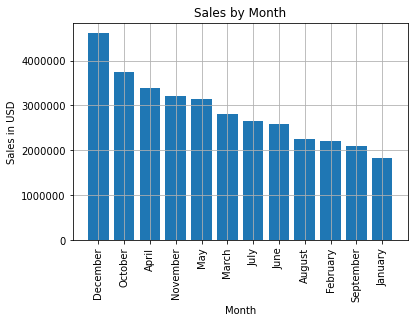

In [138]:
plt.bar(graph_sales["Month"],graph_sales["Sales $"])  
plt.xticks(graph_sales["Month"],rotation="vertical") 
plt.ylabel("Sales in USD") 
plt.xlabel("Month") 
plt.ticklabel_format(axis="y", style="plain")  
plt.title("Sales by Month")
plt.grid()
plt.show 

***
# <span style=color:red>Question:</span>
## <span style=color:red>What City had the highest number of Sales?</span>

### Seperate the Purchase Address into multiple columns by using the "," as the delimeter:

In [140]:
Sales_1[["Street Address","City","State Zip"]] = Sales_1["Purchase Address"].str.split(",",expand=True)
Sales_1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales $,Street Address,City,State Zip
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,917 1st St,Dallas,TX 75001
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,682 Chestnut St,Boston,MA 02215
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,669 Spruce St,Los Angeles,CA 90001
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,669 Spruce St,Los Angeles,CA 90001
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,333 8th St,Los Angeles,CA 90001


### Split the State Zip column:

In [141]:
Sales_1["State"] = Sales_1["State Zip"].str.split(" ",expand=True)[1]
Sales_1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales $,Street Address,City,State Zip,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,917 1st St,Dallas,TX 75001,TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,682 Chestnut St,Boston,MA 02215,MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,669 Spruce St,Los Angeles,CA 90001,CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,669 Spruce St,Los Angeles,CA 90001,CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,333 8th St,Los Angeles,CA 90001,CA


### Concantenate the columns: City and State:

In [142]:
Sales_1["City-State"] = Sales_1["City"] + "-" + Sales_1["State"] 
Sales_1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales $,Street Address,City,State Zip,State,City-State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,917 1st St,Dallas,TX 75001,TX,Dallas-TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,682 Chestnut St,Boston,MA 02215,MA,Boston-MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,669 Spruce St,Los Angeles,CA 90001,CA,Los Angeles-CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,669 Spruce St,Los Angeles,CA 90001,CA,Los Angeles-CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,333 8th St,Los Angeles,CA 90001,CA,Los Angeles-CA


### Combining the city and state, since there are cities with the same name in different states.

### Drop Columns that arent needed:

In [143]:
Sales_1.drop(columns={"Street Address","City","State Zip","State"},inplace=True)
Sales_1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales $,City-State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas-TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston-MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles-CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles-CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles-CA


In [146]:
city_sales = Sales_1.groupby("City-State")["Sales $"].sum().sort_values(ascending=False).round(2).reset_index()
city_sales.head()

,City-State,Sales $
0,San Francisco-CA,8262203.91
1,Los Angeles-CA,5452570.80
2,New York City-NY,4664317.43
3,Boston-MA,3661642.01
4,Atlanta-GA,2795498.58


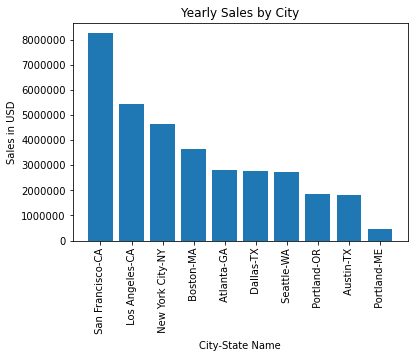

In [147]:
plt.bar(city_sales["City-State"],city_sales["Sales $"])
plt.title("Yearly Sales by City")
plt.xlabel("City-State Name")
plt.ylabel("Sales in USD")
plt.xticks(rotation="vertical",size=10) # fix the x value names 
plt.ticklabel_format(axis="y",style="plain") #Removes the scientific notation in the y-axis values
plt.show()

# Answer: 
### <span style=color:blue>The City-State with the highest amount of sales is San Francisco-California</span>

***
# Question: 
## What time should we display advertisements to maximize likelihood of customer's buying product?


In [149]:
max_advertise = Sales_1.copy()

### Create a Hour of Purchase column: 
    This column is going to show the hour of Purchase, so if something was bought at 8:45 PM it will show 8 PM. 

In [158]:
max_advertise["Hour of Purchase"] = max_advertise["Order Date"].dt.strftime("%#I %p")
max_advertise.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales $,City-State,Hour of Purchase
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas-TX,8 AM
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston-MA,10 PM
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles-CA,2 PM
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles-CA,2 PM
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles-CA,9 AM


In [169]:
max_advertise["Hour"] = max_advertise["Order Date"].dt.hour
max_advertise["Hour"] = max_advertise["Hour"].astype(int)
max_advertise.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales $,City-State,Hour of Purchase,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas-TX,8 AM,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston-MA,10 PM,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles-CA,2 PM,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles-CA,2 PM,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles-CA,9 AM,9


In [172]:
max_adv_graph = max_advertise.groupby(["Hour of Purchase","Hour"])["Quantity Ordered"].sum().reset_index()
max_adv_graph = max_adv_graph.sort_values(by="Hour",ascending=True)
max_adv_graph

,Hour of Purchase,Hour,Quantity Ordered
6,12 AM,0,4428
0,1 AM,1,2619
8,2 AM,2,1398
10,3 AM,3,928
12,4 AM,4,937
14,5 AM,5,1493
16,6 AM,6,2810
18,7 AM,7,4556
20,8 AM,8,7002
22,9 AM,9,9816


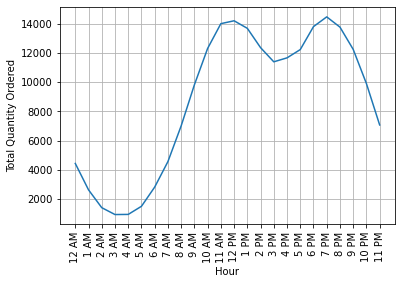

In [176]:
plt.plot(max_adv_graph["Hour of Purchase"],max_adv_graph["Quantity Ordered"])
plt.xticks(max_adv_graph["Hour of Purchase"],rotation="vertical")
plt.xlabel("Hour")
plt.ylabel("Total Quantity Ordered")
plt.grid()
plt.show()

# Answer:
### <span style=color:blue>Based on the data it would probably be beneficial to advertise around hours: 11 AM, 12 PM, 6 PM, and 7 PM since those are the peaks for the day
</span>

***
# <span style=color:red>Question:</span>
## <span style=color:red>What Products are most often sold together?</span>

In [177]:
products_1 = Sales_1[["Order ID","Product"]].copy()
products_1.head()

,Order ID,Product
0,176558,USB-C Charging Cable
1,176559,Bose SoundSport Headphones
2,176560,Google Phone
3,176560,Wired Headphones
4,176561,Wired Headphones


    Have to create a new DataFrame that will only have the duplicated values

In [178]:
products_dup_only = products_1[products_1["Order ID"].duplicated(keep=False)] #Keep = False, will keep all the duplicated values
products_dup_only.head()

,Order ID,Product
2,176560,Google Phone
3,176560,Wired Headphones
17,176574,Google Phone
18,176574,USB-C Charging Cable
29,176585,Bose SoundSport Headphones


    Need to create a new column that has both products that have the same Order ID

In [181]:
products_dup_only["Grouped Items"] = products_dup_only.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))
products_dup_only.head()

# creating a new column called Grouped Items 
#grouping the data by Order Id and then placing a sub group with Products
# Using the transform method since it allows us to make changes to the groupby and sub group, if you try and use apply NaN will appear in the new column
# lambda x: ",".join(x) -> this is basically taking all the products that are grouped by the Order ID and joining them together while seperating them by a comma 

<ipython-input-181-702856948475>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_dup_only["Grouped Items"] = products_dup_only.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))


,Order ID,Product,Grouped Items
2,176560,Google Phone,"Google Phone, Wired Headphones"
3,176560,Wired Headphones,"Google Phone, Wired Headphones"
17,176574,Google Phone,"Google Phone, USB-C Charging Cable"
18,176574,USB-C Charging Cable,"Google Phone, USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,"Bose SoundSport Headphones, Bose SoundSport He..."


    Now after creating the new column, we can delete the duplicate Order IDs since we already added the products together in the Grouped Items column

In [182]:
product_final = products_dup_only[["Order ID","Grouped Items"]].drop_duplicates()

In [184]:
product_final["Grouped Items"].value_counts(ascending=False)

iPhone, Lightning Charging Cable                       882
Google Phone, USB-C Charging Cable                     856
iPhone, Wired Headphones                               361
Vareebadd Phone, USB-C Charging Cable                  312
Google Phone, Wired Headphones                         303
                                                      ... 
AAA Batteries (4-pack), LG Dryer                         1
Google Phone, USB-C Charging Cable, Vareebadd Phone      1
27in 4K Gaming Monitor, LG Dryer                         1
LG Dryer, 27in 4K Gaming Monitor                         1
20in Monitor, Flatscreen TV                              1
Name: Grouped Items, Length: 366, dtype: int64

# Answer:
## <span style=color:blue>The products that are most often sold with each other are</span>
* <span style=color:blue>iPhone & Lightning Charging Cable</span>
* <span style=color:blue>Google Phone & USB-C Charging Cable</span>
* <span style=color:blue>iPhone, Wired Headphones</span>

***
# <span style=color:red>Question:</span>
## <span style=color:red>What product sold the most? Why do you think it sold the most?</span>
 

In [186]:
Sales_1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales $,City-State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas-TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston-MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles-CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles-CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles-CA
...,...,...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September,8.97,Los Angeles-CA
186845,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,700.00,San Francisco-CA
186846,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,700.00,San Francisco-CA
186847,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,379.99,San Francisco-CA


In [192]:
product_graph = Sales_1.groupby(["Product","Price Each"])["Quantity Ordered"].sum().reset_index()

In [193]:
product_graph

,Product,Price Each,Quantity Ordered
0,20in Monitor,109.99,4129
1,27in 4K Gaming Monitor,389.99,6244
2,27in FHD Monitor,149.99,7550
3,34in Ultrawide Monitor,379.99,6199
4,AA Batteries (4-pack),3.84,27635
5,AAA Batteries (4-pack),2.99,31017
6,Apple Airpods Headphones,150.00,15661
7,Bose SoundSport Headphones,99.99,13457
8,Flatscreen TV,300.00,4819
9,Google Phone,600.00,5532


<ipython-input-196-2b3480292ebb>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_graph["Product"],rotation="vertical",size=8)


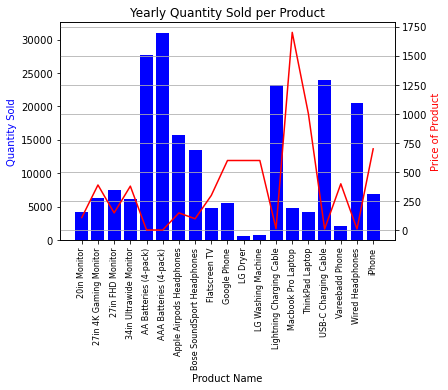

In [196]:
fig, ax1 = plt.subplots() # Use to have two x values or two y values in a graph at the same time

ax2 = ax1.twinx()
ax1.bar(product_graph["Product"],product_graph["Quantity Ordered"],color="b") # creates a bar graph(x values, y values, color of bars)
ax2.plot(product_graph["Product"],product_graph["Price Each"],"r-") # creates the line graph(same x values, y2 values or in this case the price of each product)

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Sold",color="b")
ax1.set_xticklabels(product_graph["Product"],rotation="vertical",size=8)
ax2.set_ylabel("Price of Product",color="r")
plt.title("Yearly Quantity Sold per Product")
plt.grid()
plt.show()

# Answer:
### <span style=color:blue>The product with the most quantity sold within a year is: AAA Batteries(4 pack). A cause for this might be because triple A batteries are very cheap and are used in a lot of things, such as: remotes, toys, games, etc... </span>

***
# Creating an Excel Spreadsheet:

In [ ]:
Sales_1.to_excel("Sales_example.xlsx") # tried method that lets you export a DF to a excel sheet